In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import scipy as sc
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('data.xlsx')

### Analysing the data

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data.shape

(303, 14)

In [8]:
print('The number of rows in the dataframe =',data.shape[0])
print('The number of columns in the dataframe=',data.shape[1])

The number of rows in the dataframe = 303
The number of columns in the dataframe= 14


In [9]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates etc.

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [12]:
data.duplicated().sum()

1

### Based on the findings from the previous question remove duplicates (if any) , treat missing values using appropriate strategy.
 

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data.reset_index(drop = True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
data.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [20]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot

In [21]:
 plot_cat=pd.get_dummies(data,columns =['sex','cp','fbs','restecg','exang','slope','ca','thal'])   

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
plot_cat[columns_to_scale]= standardScaler.fit_transform(plot_cat[columns_to_scale])


In [23]:
data['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [24]:
data['age']=data['age'].replace(['26-40','41-55','56-70','> 70','< 25'],['young_adults','adults','middle-aged','old','youth'])

In [25]:
data['age'].value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

<Axes: xlabel='age'>

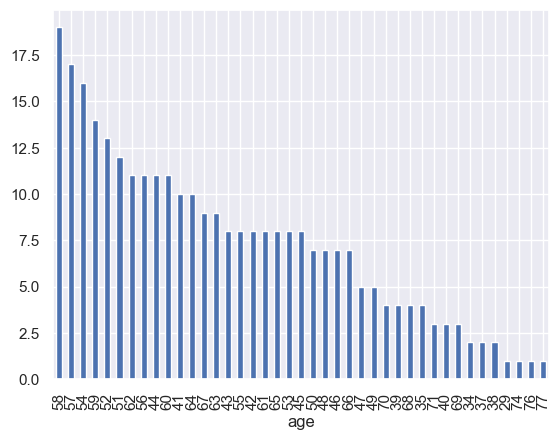

In [26]:
data['age'].value_counts().plot(kind = 'bar')

In [27]:
pd.get_dummies(data['age'])

,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

<Axes: xlabel='sex'>

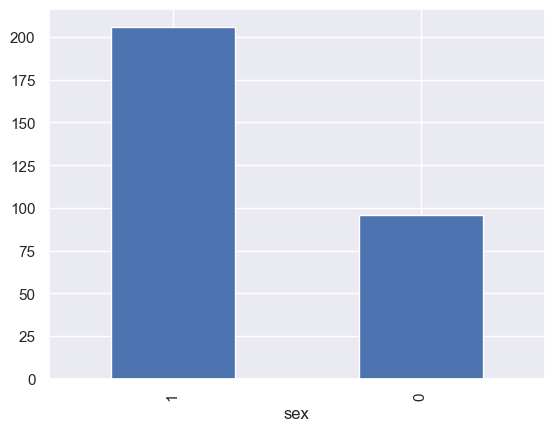

In [29]:
data['sex'].value_counts().plot(kind='bar')

In [30]:
data['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

<Axes: xlabel='cp'>

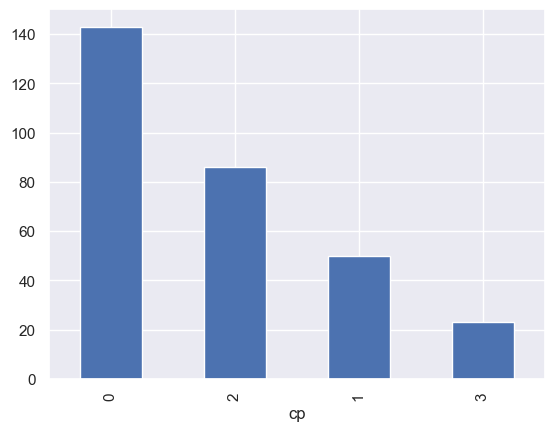

In [31]:
data['cp'].value_counts().plot(kind = 'bar')

In [32]:
data['fbs'].value_counts()

fbs
0    257
1     45
Name: count, dtype: int64

<Axes: xlabel='fbs'>

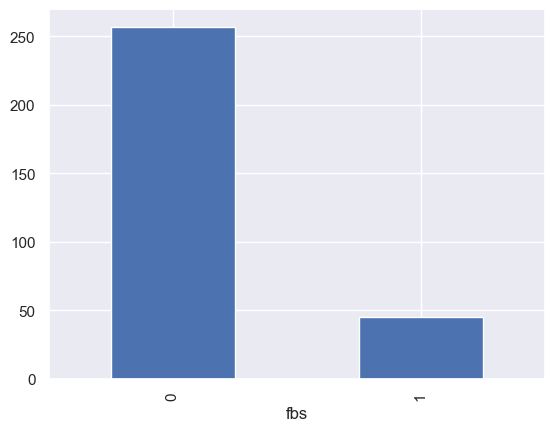

In [33]:
data['fbs'].value_counts().plot(kind = 'bar')

In [34]:
data['restecg'].value_counts()

restecg
1    151
0    147
2      4
Name: count, dtype: int64

<Axes: xlabel='restecg'>

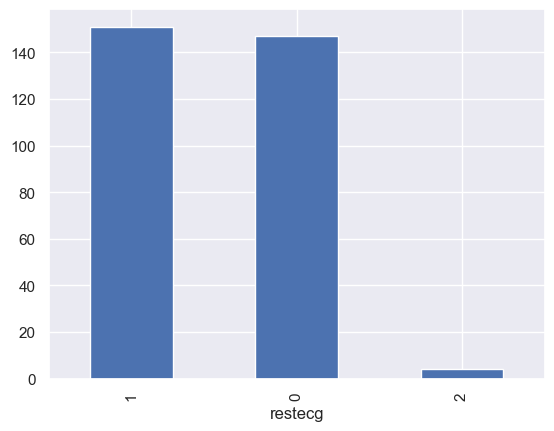

In [35]:
data['restecg'].value_counts().plot(kind='bar')

In [36]:
data['exang'].value_counts()

exang
0    203
1     99
Name: count, dtype: int64

<Axes: xlabel='exang'>

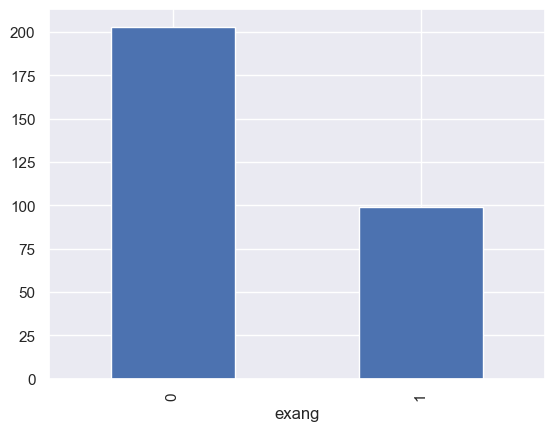

In [37]:
data['exang'].value_counts().plot(kind='bar')

In [38]:
data['slope'].value_counts()

slope
2    141
1    140
0     21
Name: count, dtype: int64

<Axes: xlabel='slope'>

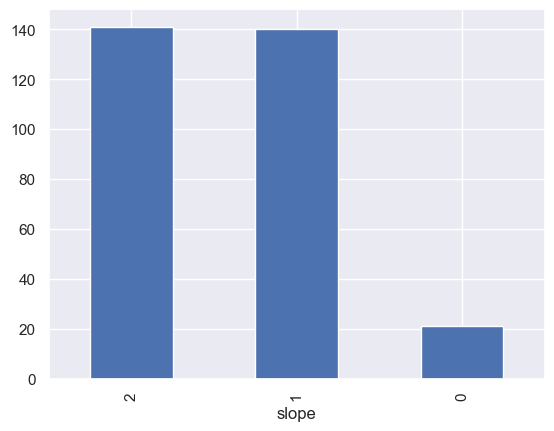

In [39]:
data['slope'].value_counts().plot(kind='bar')

In [40]:
data['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64

<Axes: xlabel='ca'>

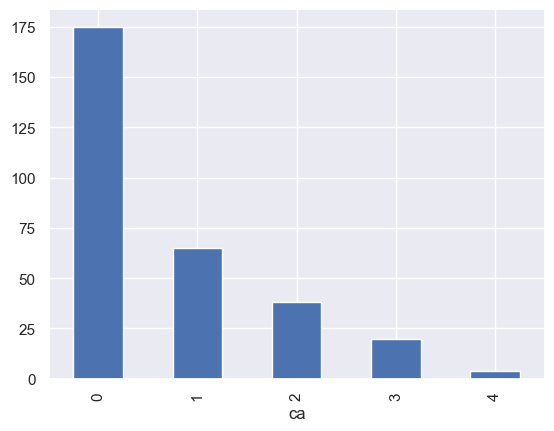

In [41]:
data['ca'].value_counts().plot(kind='bar')

In [42]:
data['thal'].value_counts()

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64

<Axes: xlabel='thal'>

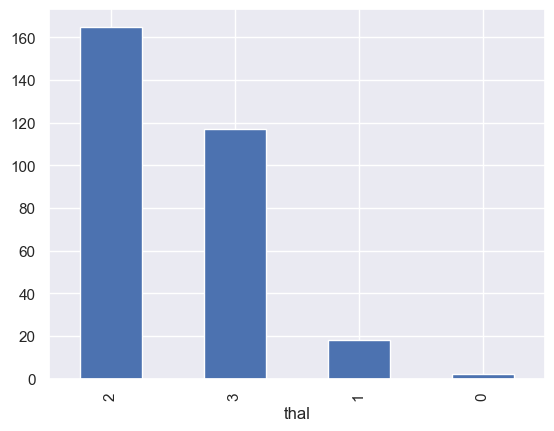

In [43]:
data['thal'].value_counts().plot(kind='bar')

In [46]:
plot_cat.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


### Study the occurrence of CVD across Age.

In [47]:
data['age'].value_counts(normalize = True)

age
58    0.062914
57    0.056291
54    0.052980
59    0.046358
52    0.043046
51    0.039735
62    0.036424
56    0.036424
44    0.036424
60    0.036424
41    0.033113
64    0.033113
67    0.029801
63    0.029801
43    0.026490
55    0.026490
42    0.026490
61    0.026490
65    0.026490
53    0.026490
45    0.026490
50    0.023179
48    0.023179
46    0.023179
66    0.023179
47    0.016556
49    0.016556
70    0.013245
39    0.013245
68    0.013245
35    0.013245
71    0.009934
40    0.009934
69    0.009934
34    0.006623
37    0.006623
38    0.006623
29    0.003311
74    0.003311
76    0.003311
77    0.003311
Name: proportion, dtype: float64

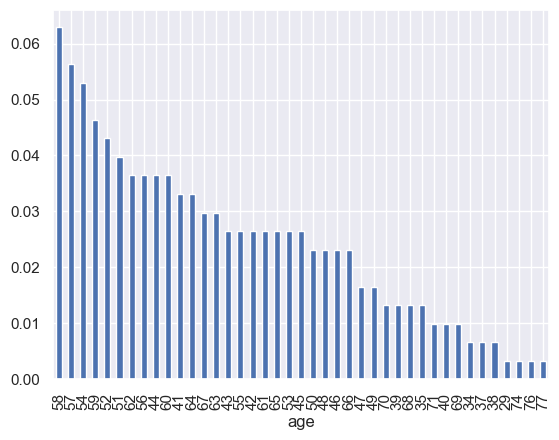

In [48]:
data['age'].value_counts(normalize = True).plot(kind='bar')
plt.show()

In [49]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [50]:
data.groupby('target')['age'].mean()

target
0    56.601449
1    52.585366
Name: age, dtype: float64

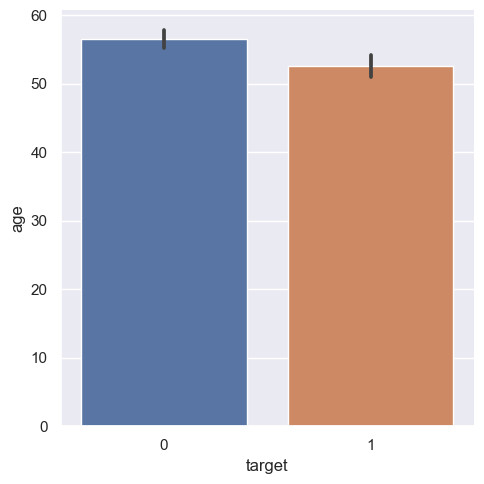

In [51]:
sns.catplot(data = data,y = 'age',x= 'target',kind = 'bar')
plt.show()

In [52]:
data_cat = data.select_dtypes(include =['category'])
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Empty DataFrame


In [53]:
data_cont = data.select_dtypes(include =['float'])
data_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oldpeak  302 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


### Study the composition of overall patients w.r.t . Gender.

In [54]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [55]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

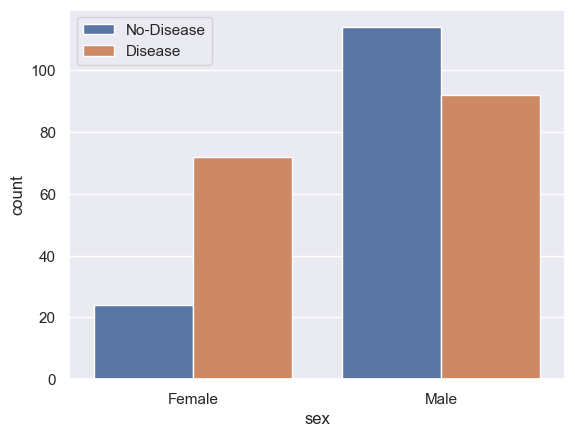

In [56]:
sns.countplot(x='sex',hue="target",data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

### Can we detect heart attack based on anomalies in Resting Blood Pressure of the patient?


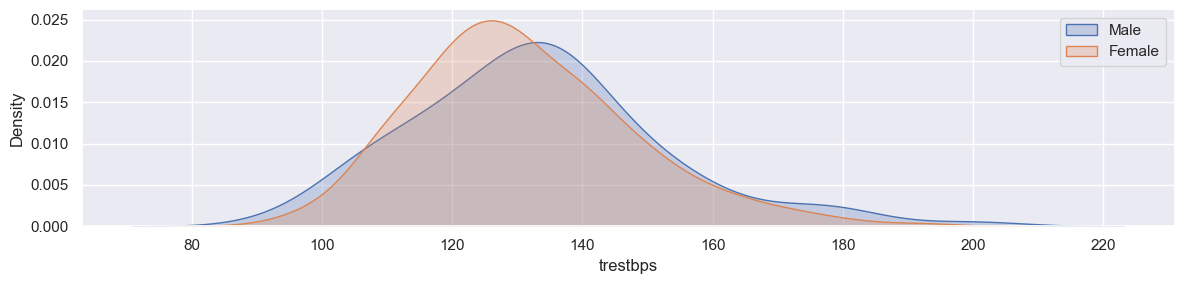

In [57]:
g= sns.FacetGrid(data,hue = "sex",aspect = 4)
g.map(sns.kdeplot,'trestbps',shade = True)
plt.legend(labels = ['Male','Female'])

### Describe the relationship between Cholesterol levels and our target variable.

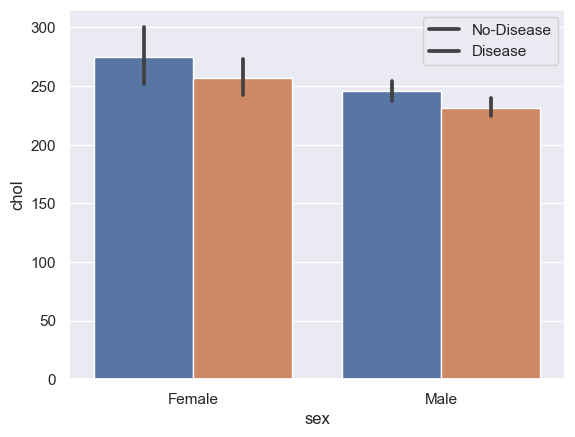

In [58]:
import seaborn as sns
ax=sns.barplot(x="sex",y="chol",hue="target",data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels = ['No-Disease','Disease'])
plt.show()


### What can be concluded about the relationship between peak exercising and occurrence of heart attack.

<Axes: >

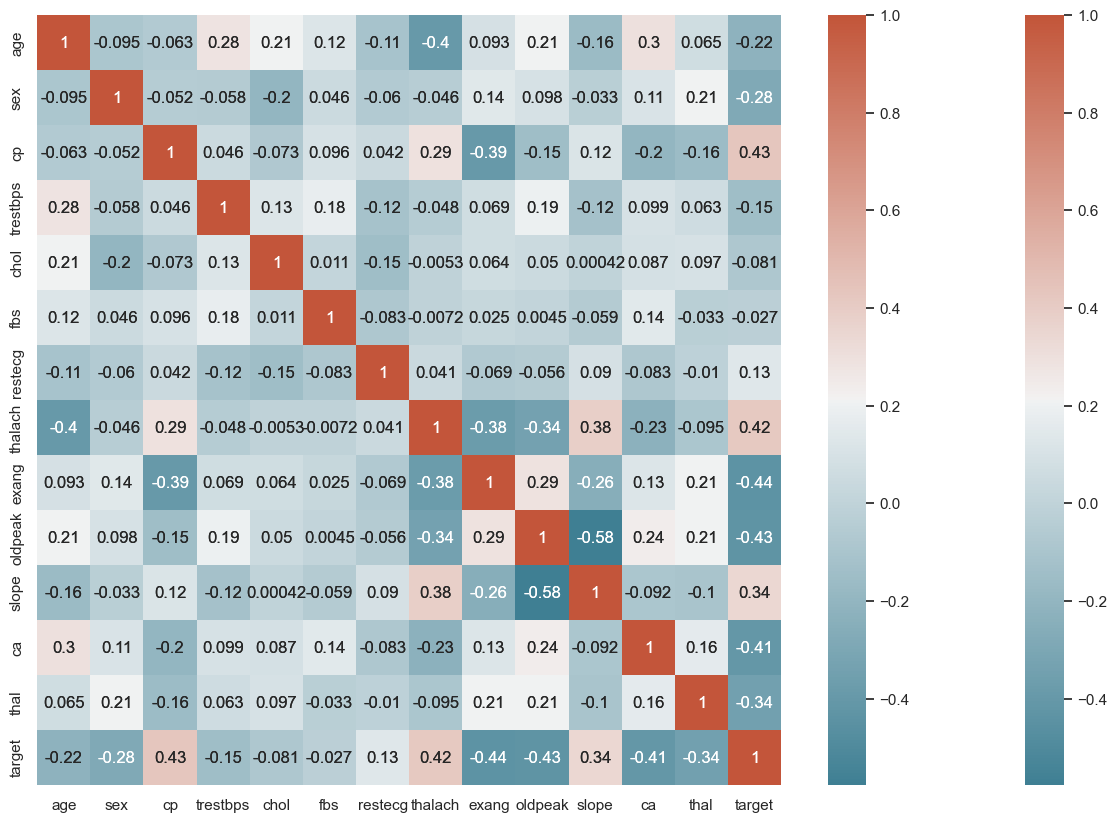

In [60]:
corr= data.corr()
plt.subplots(figsize = (15,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,cmap=sns.diverging_palette(220,20,as_cmap = True))
sns.heatmap(corr,xticklabels = corr.columns,
           yticklabels = corr.columns,
           annot= True,
           cmap =sns.diverging_palette(220,20,as_cmap=True))

#### we can see a negative corelation between peak exercise(slope) and our target. This makes sense because when you exercise, your heart requires more blood,but narrowed arteries slow down blood flow.

### Is thalassemia a major cause of CVD?

In [62]:
data['thal'].value_counts()

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64

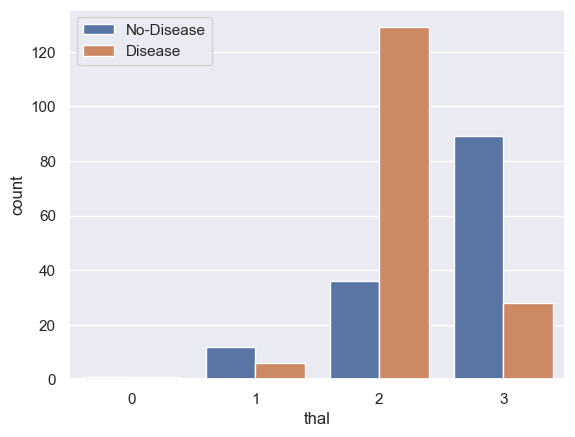

In [63]:
sns.countplot(x='thal',hue="target",data=data)
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

#### yes,because cardiac_related complications are the leading cause of death among people with thalassemia.

### How are the other factors determining the occurrence of CVD?

Text(42.271, 0.5, 'ST depression')

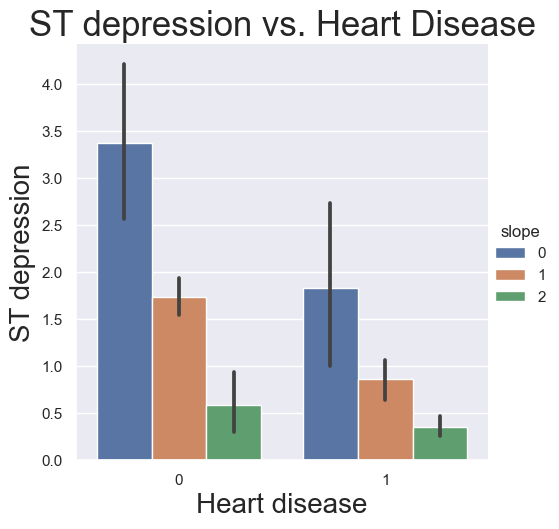

In [65]:
sns.catplot(x = "target",y = "oldpeak", hue = "slope",kind = "bar",data = data)
plt.title('ST depression vs. Heart Disease',size = 25)
plt.xlabel('Heart disease',size = 20)
plt.ylabel('ST depression',size = 20)

#### ST segment depression occurs because when the ventricle is at rest and therefore repolarized. If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. This supports the plot above because low ST Depression yields people at greater risk for Heart Disease . While a high ST depression is considered normal and healthy.

Text(0, 0.5, 'Thalach Level')

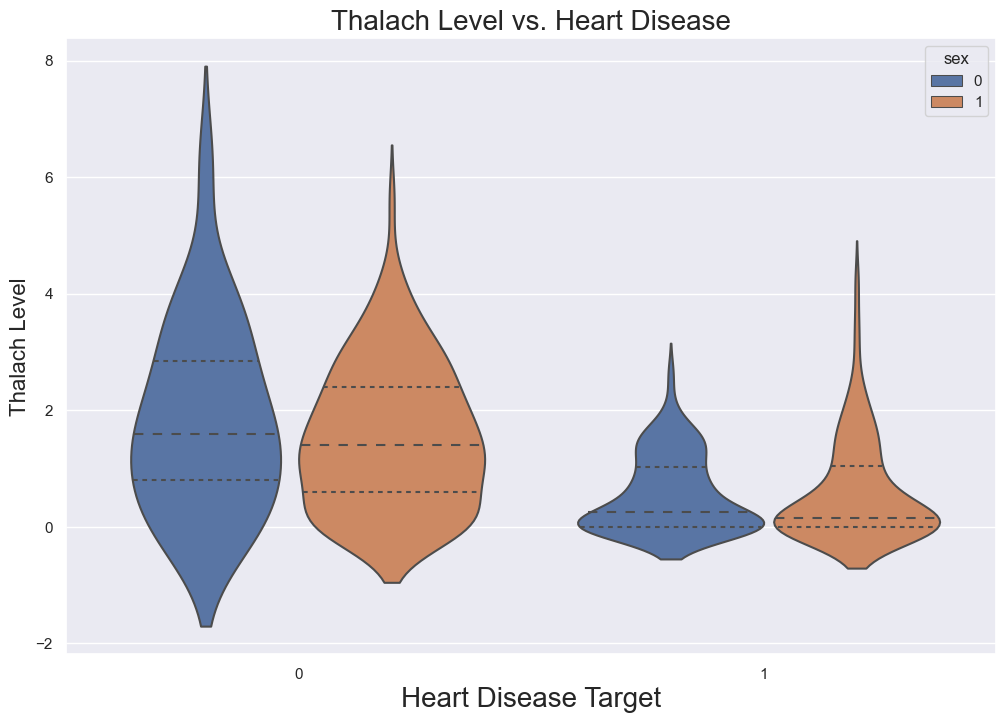

In [66]:
plt.figure(figsize = (12,8))
sns.violinplot(x='target',y='oldpeak',hue='sex',inner='quartile',data = data)
plt.title("Thalach Level vs. Heart Disease", fontsize = 20)
plt.xlabel("Heart Disease Target",fontsize = 20)
plt.ylabel("Thalach Level",fontsize = 16)

#### We can see that the overall shape and distribution for negative and positive patients differ vastly.Positive patients exhibit a lower median for ST depression level and thus a great distribution of their data is between 0 and 2, while negative patients are between 1 and 3.

### Use a pair plot to understand the relationship between all the given variables.(continuous columns)

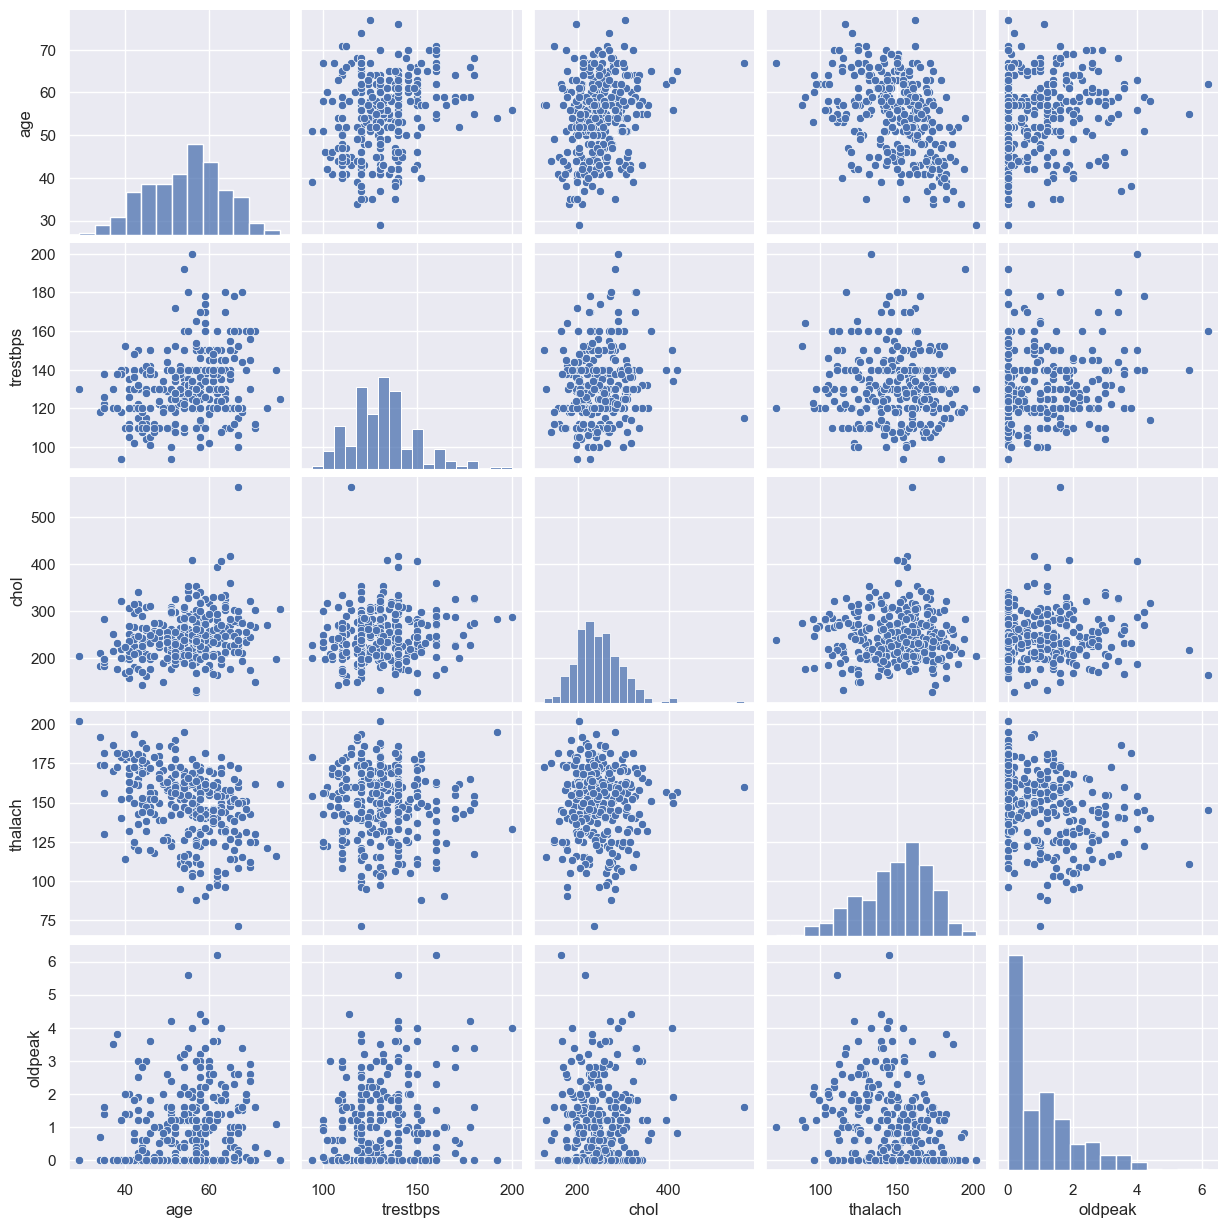

In [67]:
subdata = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subdata)

### Build a baseline model to predict using a Logistic Regression and explore the results.

In [68]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [69]:
X=data.drop(columns = 'target',axis =1)
Y=data['target']

In [70]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [71]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64


In [72]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 2)

In [73]:
print(X.shape,X_train.shape,X_test.shape)

(302, 13) (241, 13) (61, 13)


In [75]:
 model = LogisticRegression()

In [77]:
model.fit(X_train,Y_train)

LogisticRegression()

In [78]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [79]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8506224066390041


In [80]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [81]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


In [84]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('The person does not have a Heart Disease')
else:
    print('The person has Heart Disease')

[1]
The person has Heart Disease


In [85]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('The person does not have a Heart Disease')
else:
    print('The person has Heart Disease')

[0]
The person does not have a Heart Disease
